# Term Project - Ganesh Kale

## Bank Credit Card Customers - Predict Churning Customers

### Information about the Data Set
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

This dataset was obtained from a website with the URL as https://leaps.analyttica.com/home.
The dataset consists of around 10K records that means customers information such as - age, salary, marital status, credit card limit, category etc.

### Business Problem :- 
The objective of this data analysis project is to better understand the attributes that are making impact on customer's decision to leave the credit card company and after finalizing the attributes another goal is to identify such customers who are going to leave. 
1. Identify the key features/factors that driving customer to drop off.
2. Identify the customers having high likelihood of attrition 

### How to tackle Business Problem - 
In order to tackle the business problem we are going to perform belwo tasks.
1. Exploratory Data Analysis  - Explore the different features with help of visualization and statistical summary. This activity will provide more insights about the it and we can choose the feature that could be influencing customers to drop off.
2. Feature correlations - This activity will help us identify features which have more impact on customers decision.
3. Modeling - Selecting right algorithm for model and evaluating the model result.

### Feature information - 
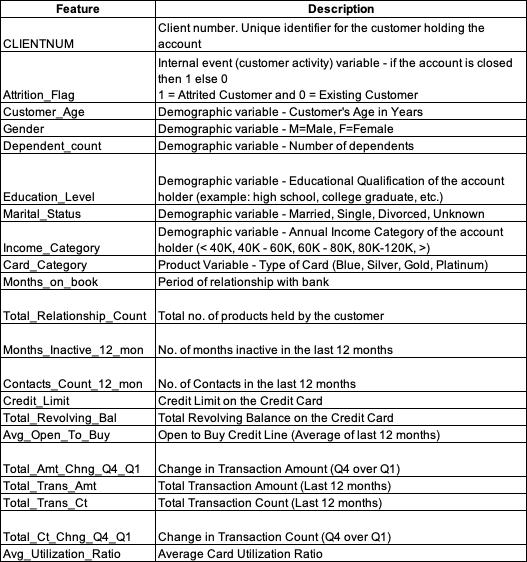

### Feature Selection - 
All the features definition is given in above table, here I would like to mention features which are useful to tackle the busniess problem. I am going to use below variables to solve this business problem.
1. Attrition_Flag - This is the target variable, which tells us what are customers with bank and what are left the bank.
2. Customer_Age - This tells us the age of the customer, I am going to keep this to see if age influence the customer to leave. In real world customers who are about to retire or already retired have chances of leaving because they might not be interested in credit because of limited income source.
3. Income_category - Given income ranges in which customers income falls
4. Card_category - This columns tells that which card category customers have.
5. Months_on_book - How long customer is with bank.
6. Total_relationship_Count - Total number of products held by customer
7. Months_inactive_12_mon - How many months customer was inactive in last 12 months, means number of months  customer did not use credit card 
8. Contacts_Count_12_mon - How many times customer contacted bank in last 12 months
9. Total_Revolving_Balance - The outstanding balance on the card which gets carried to next month if customer does not pay
10. Avg_Utilization_Ratio - This measures the how much credit cusotmer is using compared to how much is available.
11. Avg_Open_To_Buy - It is average credit available allocated to the customers.
12. Total_Trans_Ct - Total transactions counts made by customer in last 12 months
13. Total_Trans_Amt - Total transaction amount or amount spent on each transactions in last 12 months

### import packages required for EDA

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import thinkstats2
import thinkplot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### load the data set - credit card customers

In [2]:
bank = pd.read_csv('BankChurners.csv')

### display size and top five rows from the customers dataset

In [3]:
bank.shape
bank.head()

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

### drop unwanted columns

In [5]:
bank.drop(['CLIENTNUM','Gender','Dependent_count','Education_Level', 'Marital_Status','Credit_Limit','Total_Amt_Chng_Q4_Q1'
       , 'Total_Ct_Chng_Q4_Q1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

#### top 5 rows of dataframe after removing columns

In [6]:
bank.head()

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,$60K - $80K,Blue,39,5,1,3,777,11914.0,1144,42,0.061
1,Existing Customer,49,Less than $40K,Blue,44,6,1,2,864,7392.0,1291,33,0.105
2,Existing Customer,51,$80K - $120K,Blue,36,4,1,0,0,3418.0,1887,20,0.000
3,Existing Customer,40,Less than $40K,Blue,34,3,4,1,2517,796.0,1171,20,0.760
4,Existing Customer,40,$60K - $80K,Blue,21,5,1,0,0,4716.0,816,28,0.000


In [7]:
bank.replace(to_replace='Less than $40K', value='$40K & less',inplace=True)

#### Customers data frame information
The dataset contains no missing data, all the data present for selected features

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Income_Category           10127 non-null  object 
 3   Card_Category             10127 non-null  object 
 4   Months_on_book            10127 non-null  int64  
 5   Total_Relationship_Count  10127 non-null  int64  
 6   Months_Inactive_12_mon    10127 non-null  int64  
 7   Contacts_Count_12_mon     10127 non-null  int64  
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


### Statistical information about dataset

In [9]:
bank.describe()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,35.928409,3.812580,2.341167,2.455317,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,8.016814,7.986416,1.554408,1.010622,1.106225,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,26.000000,13.000000,1.000000,0.000000,0.000000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,31.000000,3.000000,2.000000,2.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,46.000000,36.000000,4.000000,2.000000,2.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,52.000000,40.000000,5.000000,3.000000,3.000000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,73.000000,56.000000,6.000000,6.000000,6.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


## Exploratory Data Analysis

### Indentify missing values in the features

#### This shows that zero missing values in each feature

In [10]:
bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

### Visualize missing values

#### Based on below matrix chart we can see in each feature that missing values or nulls are not present.
#### We can say that the features do not have any missing data

<AxesSubplot:>

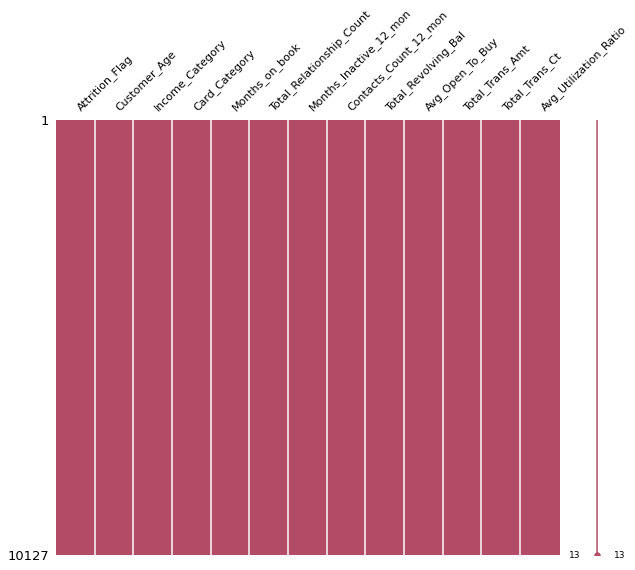

In [11]:
msno.matrix(bank,figsize=(10,8), fontsize=11, color=(0.7,0.3,0.4))

### Verify features with categorical types for any unknown values - Visualization

#### Income Category columns shows the unknown value

Based on below bar charts Income_category column has unknown values which do not give accurate information about income of the customer, these unknown values can be treated as outliers in income category column and will be removed.

*******************************************************
Attrition_Flag: ['Existing Customer' 'Attrited Customer']
*******************************************************
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
*******************************************************
Income_Category: ['$60K - $80K' '$40K & less' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
*******************************************************
$40K & less     3561
$40K - $60K     1790
$80K - $120K    1535
$60K - $80K     1402
Unknown         1112
$120K +          727
Name: Income_Category, dtype: int64
*******************************************************
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']
*******************************************************
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

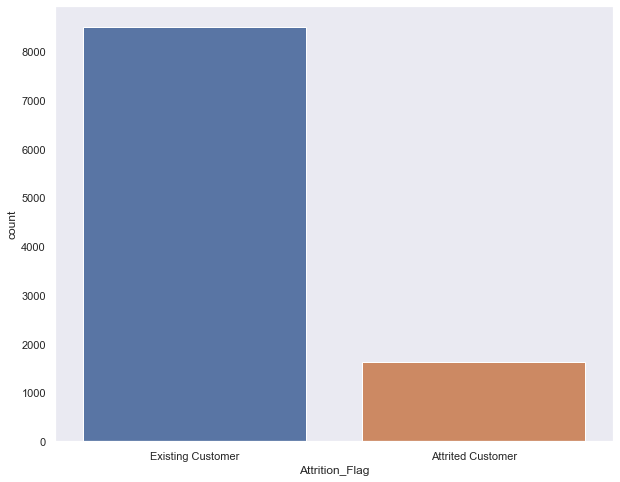

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

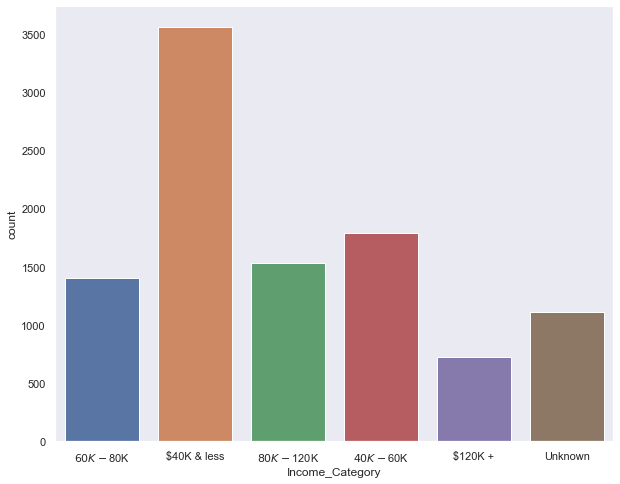

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

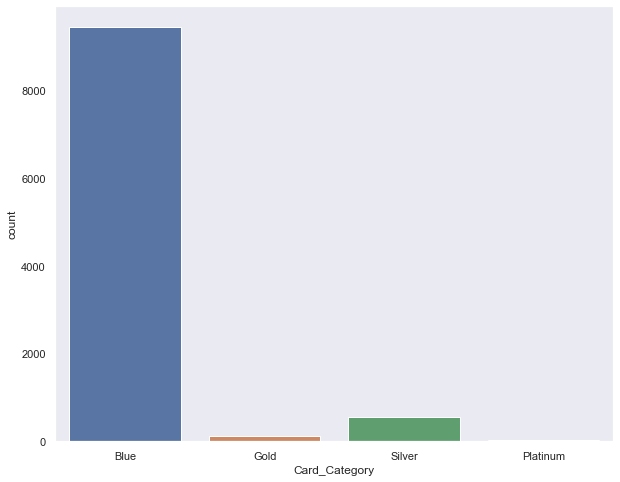

In [12]:
cat_cols = []

for feature in bank.columns:
    if bank[feature].dtype not in ['int64','float64']:
        cat_cols.append(feature)

for column in cat_cols:
    print('*'*55)
    print(f"{column}: {bank[column].unique()}")
    print('*'*55)
    print(f"{bank[column].value_counts()}")
       

for column in cat_cols:
    sns.set(style='dark')
    fig = plt.figure(figsize=(10,8))
    sns.countplot(data = bank,x = column)
    plt.show()

### Explore each feature for -  Distribution and Outliers

#### Histogram of each numeric feature
we have seen above the distribution of categorical columns with bar chart

Based on the below histograms for numerical variables, it seems customer age column has few customers with age greater than 67 years old and their count is very minimal. 
We can call them as accurate data points but with low count it can be treated as outliers.

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

Text(0.5, 1.0, 'Customer_Age')

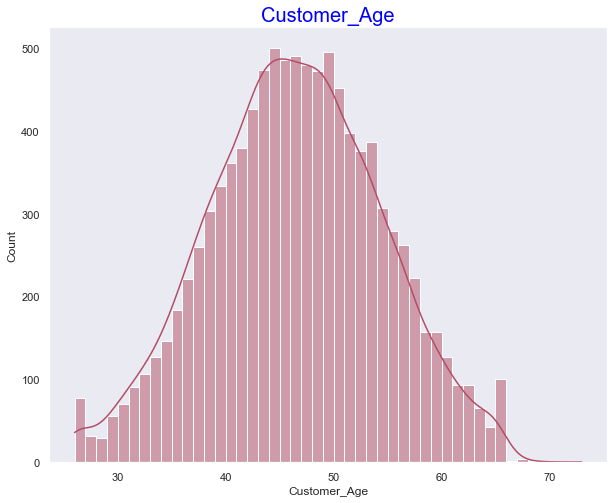

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

Text(0.5, 1.0, 'Months_on_book')

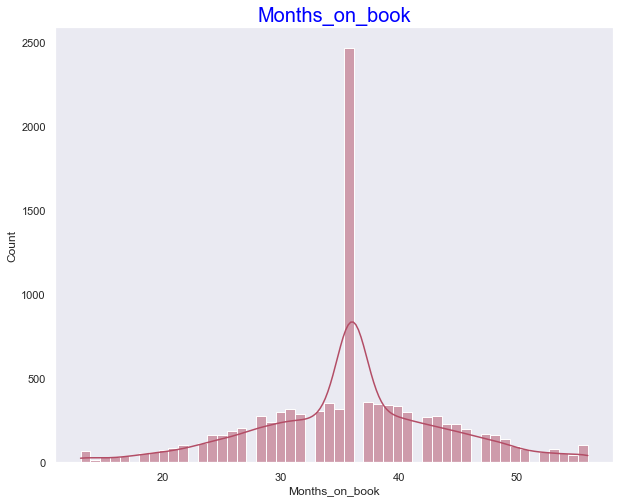

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

Text(0.5, 1.0, 'Total_Relationship_Count')

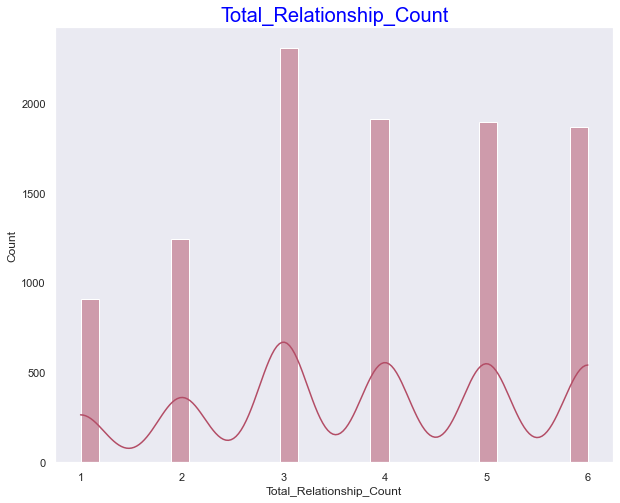

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

Text(0.5, 1.0, 'Months_Inactive_12_mon')

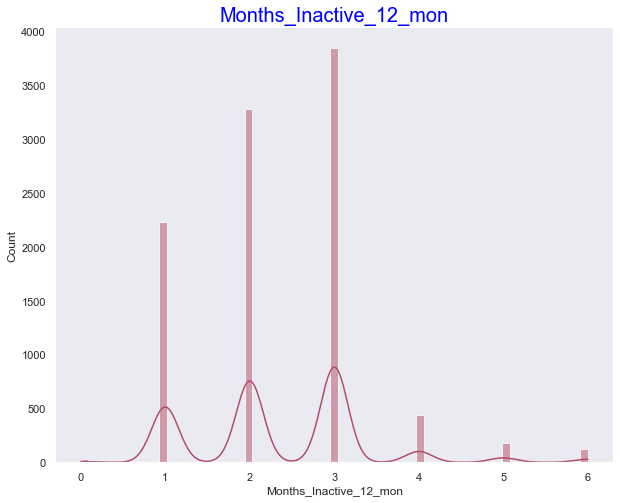

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

Text(0.5, 1.0, 'Contacts_Count_12_mon')

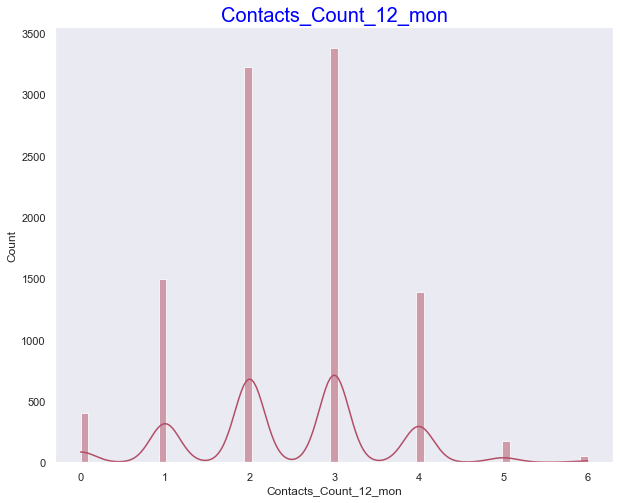

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

Text(0.5, 1.0, 'Total_Revolving_Bal')

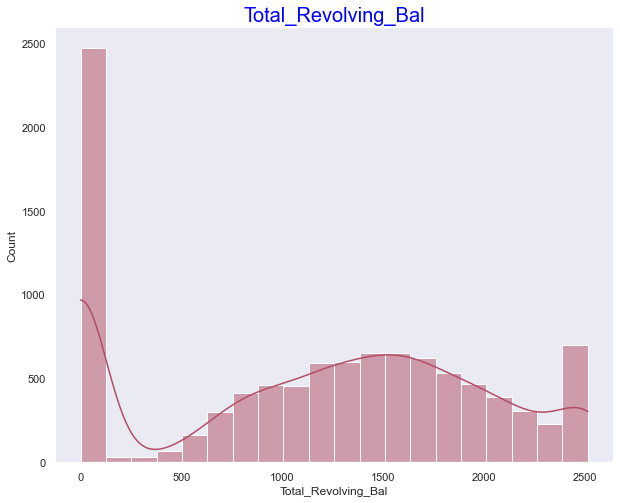

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

Text(0.5, 1.0, 'Avg_Open_To_Buy')

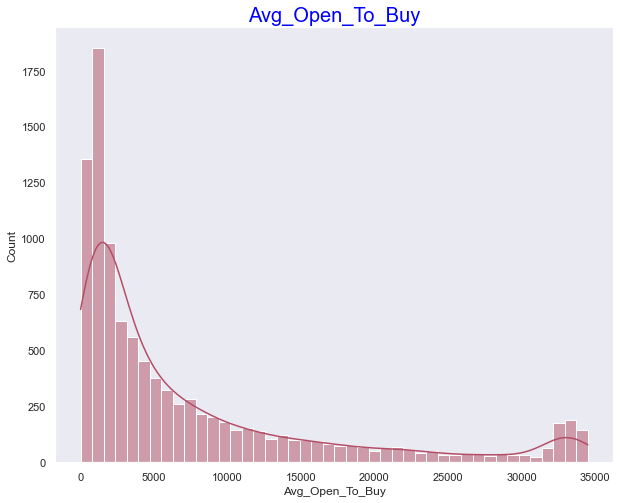

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

Text(0.5, 1.0, 'Total_Trans_Amt')

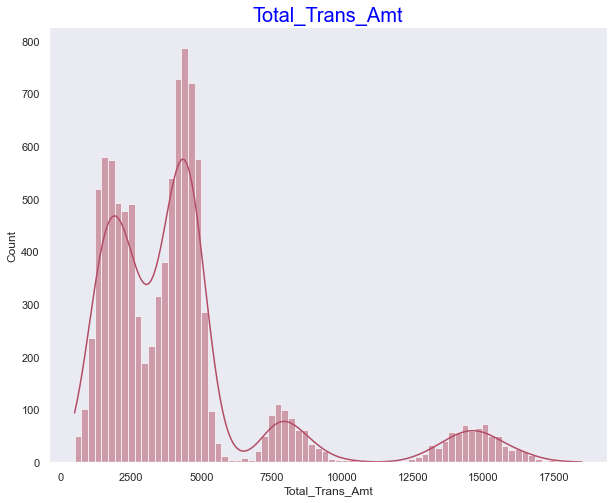

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

Text(0.5, 1.0, 'Total_Trans_Ct')

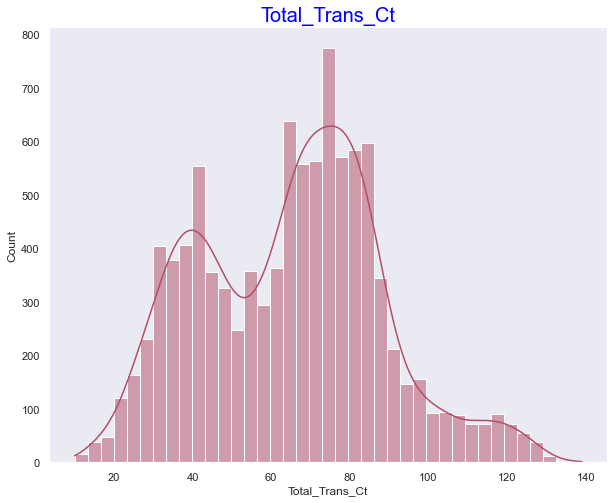

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

Text(0.5, 1.0, 'Avg_Utilization_Ratio')

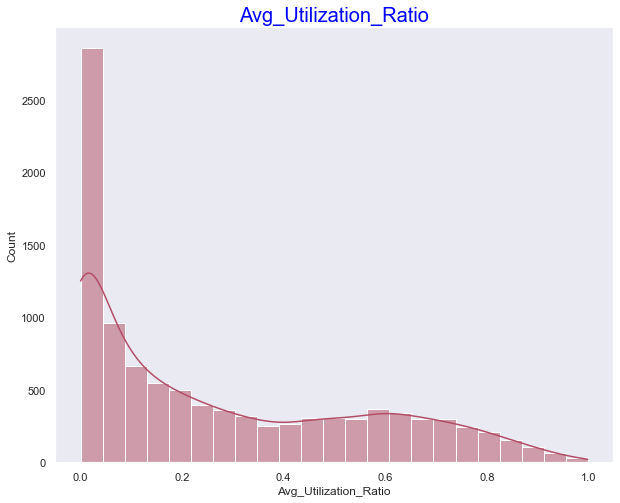

In [13]:
num_cols = []

for feature in bank.columns:
    if bank[feature].dtype in ['int64','float64']:
        num_cols.append(feature)

for column in num_cols:
    sns.set(style='dark')
    fig = plt.figure(figsize=(10,8))
    sns.histplot(data = bank,x = column, color = (0.7,0.3,0.4),kde = True)
    plt.title(column,fontdict = {'fontsize':20, 'color':'blue'})
    plt.show()

### Removed the outliers from the Income_Category and Customer_Age columns

In [14]:
bank_cleaned = bank.loc[(bank['Income_Category'] != 'Unknown') & (bank['Customer_Age'] < 67)]
bank_cleaned.shape
bank_cleaned.head(2)

(9009, 13)

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,$60K - $80K,Blue,39,5,1,3,777,11914.0,1144,42,0.061
1,Existing Customer,49,$40K & less,Blue,44,6,1,2,864,7392.0,1291,33,0.105


<AxesSubplot:xlabel='Income_Category', ylabel='count'>

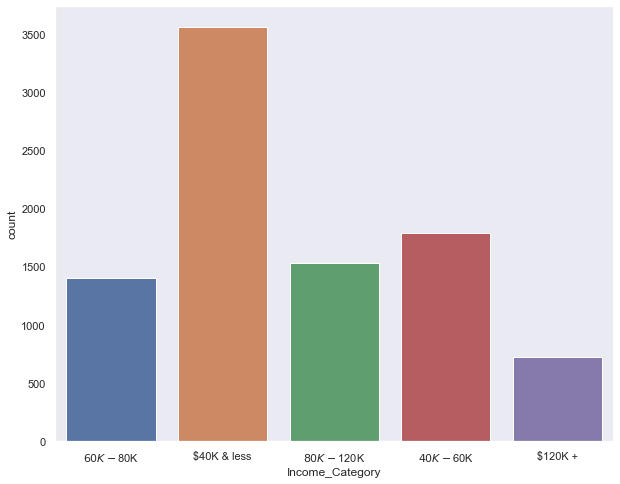

In [15]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = bank_cleaned,x = 'Income_Category')
plt.show()

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

Text(0.5, 1.0, 'Customer_Age')

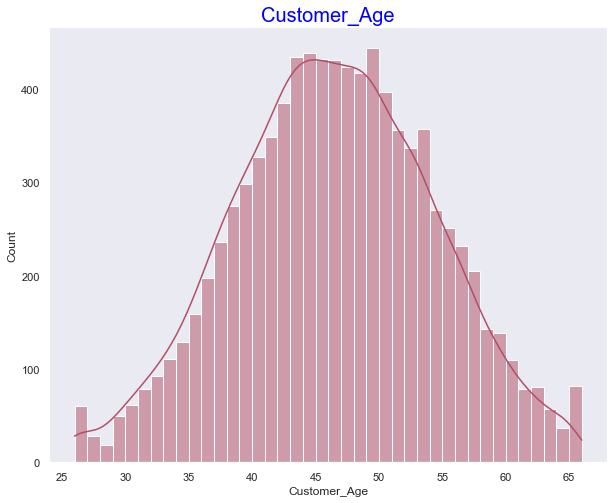

In [16]:
sns.set(style='dark')
fig = plt.figure(figsize=(10,8))
sns.histplot(data = bank_cleaned,x = 'Customer_Age', color = (0.7,0.3,0.4),kde = True, bins = 40)
plt.title('Customer_Age',fontdict = {'fontsize':20, 'color':'blue'})
plt.show()

### Summarizing the DIstributions - Statistical Characteristics

Box Plots to show the three quartile values of the distribution.
Based on these we can see outliers in columns such as - Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy etc

<AxesSubplot:xlabel='Customer_Age'>

Text(0.5, 1.0, 'Customer_Age')

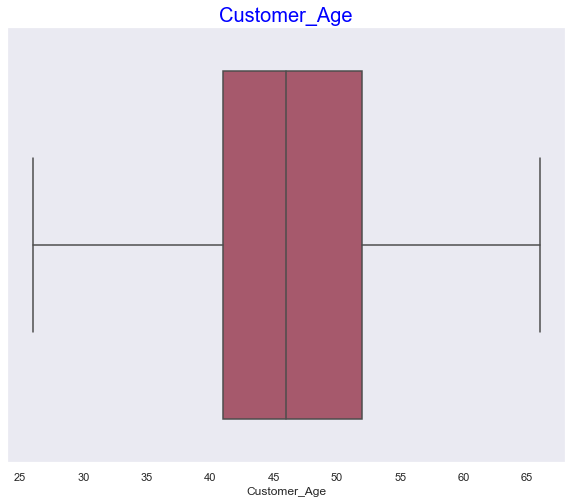

<AxesSubplot:xlabel='Months_on_book'>

Text(0.5, 1.0, 'Months_on_book')

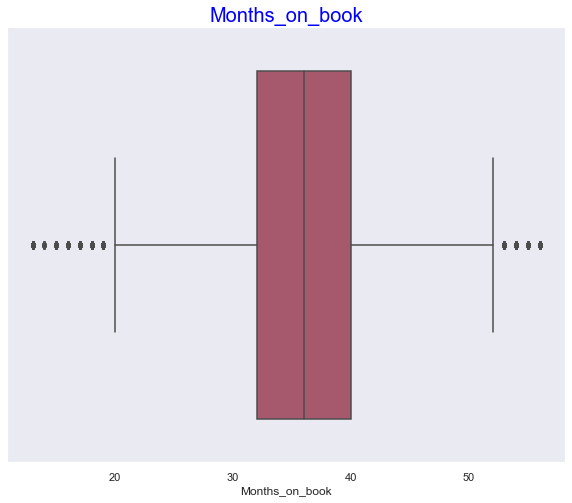

<AxesSubplot:xlabel='Total_Relationship_Count'>

Text(0.5, 1.0, 'Total_Relationship_Count')

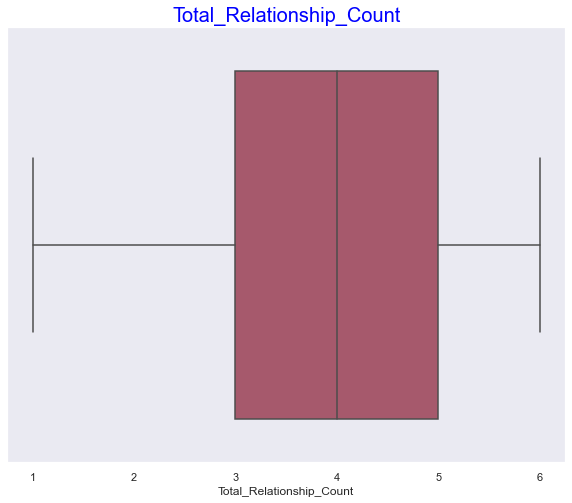

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

Text(0.5, 1.0, 'Months_Inactive_12_mon')

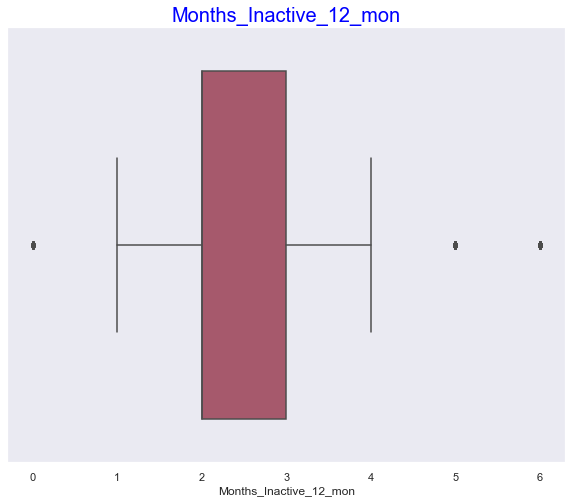

<AxesSubplot:xlabel='Contacts_Count_12_mon'>

Text(0.5, 1.0, 'Contacts_Count_12_mon')

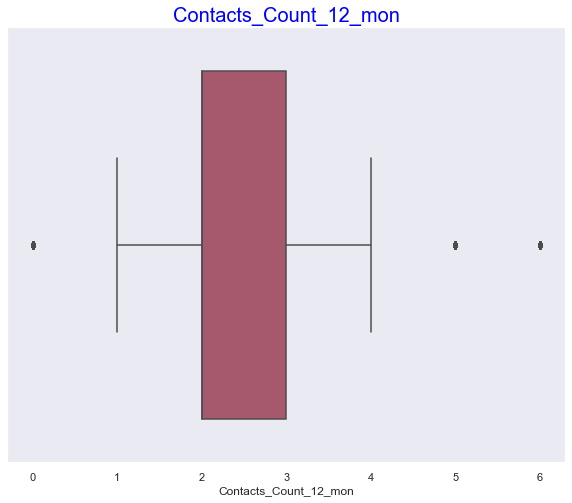

<AxesSubplot:xlabel='Total_Revolving_Bal'>

Text(0.5, 1.0, 'Total_Revolving_Bal')

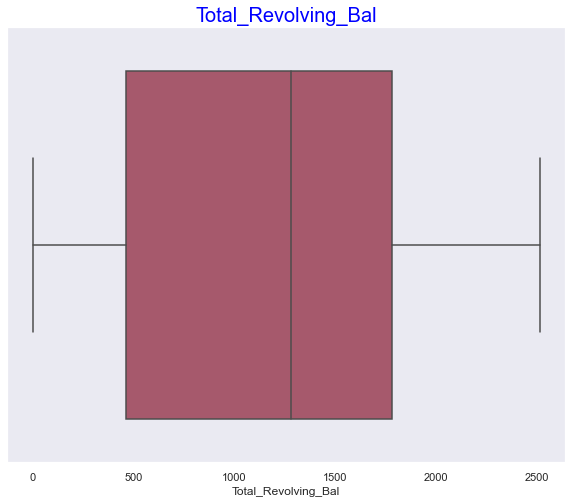

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

Text(0.5, 1.0, 'Avg_Open_To_Buy')

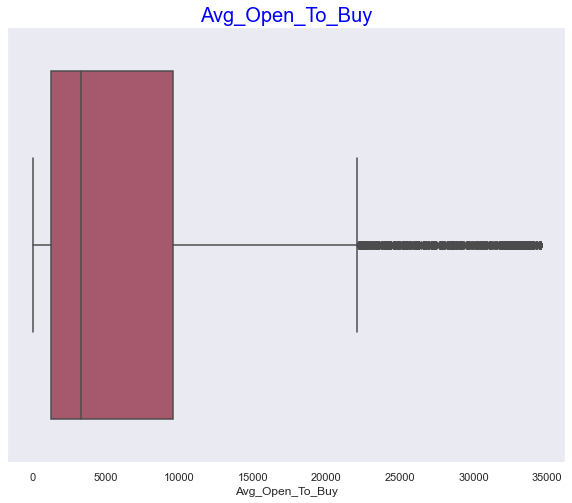

<AxesSubplot:xlabel='Total_Trans_Amt'>

Text(0.5, 1.0, 'Total_Trans_Amt')

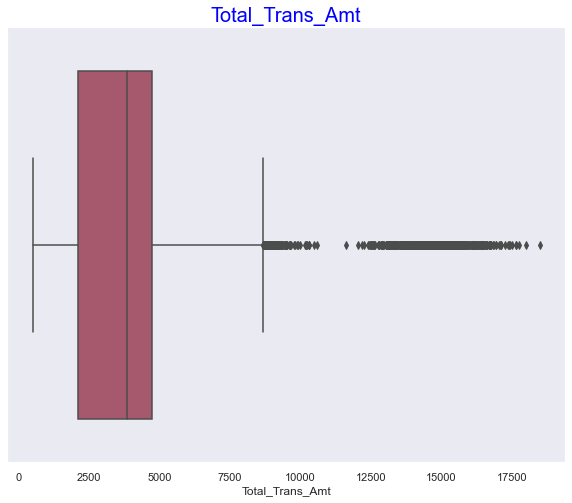

<AxesSubplot:xlabel='Total_Trans_Ct'>

Text(0.5, 1.0, 'Total_Trans_Ct')

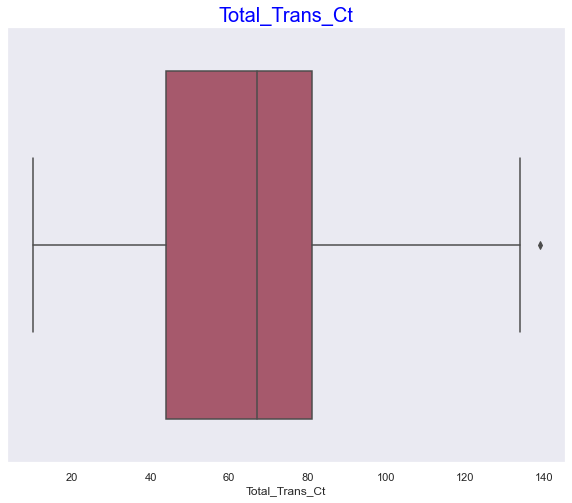

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

Text(0.5, 1.0, 'Avg_Utilization_Ratio')

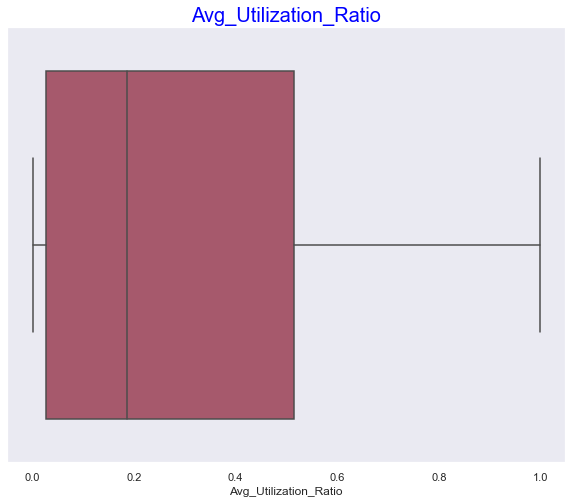

In [17]:
num_cols_cleaned = []

for feature in bank_cleaned.columns:
    if bank_cleaned[feature].dtype in ['int64','float64']:
        num_cols_cleaned.append(feature)

for column in num_cols_cleaned:
    fig = plt.figure(figsize=(10,8))
    sns.boxplot(data = bank_cleaned,x = column, color = (0.7,0.3,0.4))
    plt.title(column,fontdict = {'fontsize':20, 'color':'blue'})
    plt.show()

Based on below chart we can say the average age of customer who are attrited and who are not is same

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

Text(0.5, 1.0, 'Attrition Rate by Customer Age')

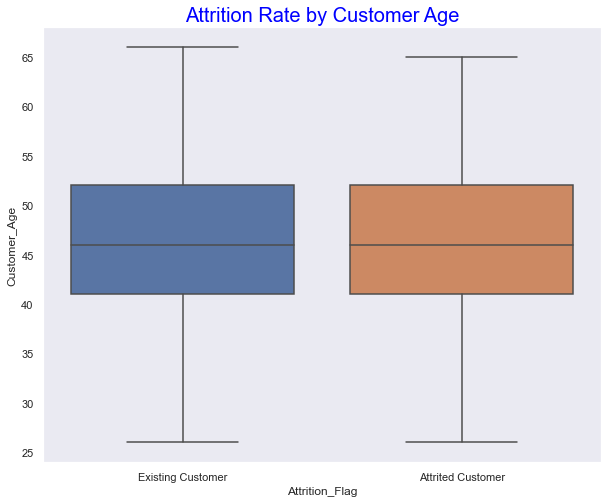

In [18]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data = bank_cleaned,x = 'Attrition_Flag',y = 'Customer_Age')
plt.title('Attrition Rate by Customer Age',fontdict = {'fontsize':20, 'color':'blue'})

Below table shows the descriptive statistics information about all the numerical features from the data set

Average age of customers is 46 years, average cards with bank are 4, contacted to bank customer services on average 2-3 times in last 12 months etc. 

In [19]:
bank_cleaned.describe()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000,9009.000000
mean,46.317460,35.940060,3.812521,2.336885,2.454767,1168.482295,7357.681330,4421.057276,64.708403,0.281426
std,7.915378,7.914884,1.556312,1.005787,1.108051,813.179502,9137.202088,3451.293814,23.672998,0.278469
min,26.000000,13.000000,1.000000,0.000000,0.000000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,32.000000,3.000000,2.000000,2.000000,463.000000,1240.000000,2119.000000,44.000000,0.026000
50%,46.000000,36.000000,4.000000,2.000000,2.000000,1280.000000,3277.000000,3870.000000,67.000000,0.185000
75%,52.000000,40.000000,5.000000,3.000000,3.000000,1784.000000,9580.000000,4745.000000,81.000000,0.515000
max,66.000000,56.000000,6.000000,6.000000,6.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


### Display Unique value counts from each columns

In [20]:
def unique_counts(df):
    features = df.columns
    for i in features:
        print(i, ":", df[i].nunique())
unique_counts(bank_cleaned)

Attrition_Flag : 2
Customer_Age : 41
Income_Category : 5
Card_Category : 4
Months_on_book : 44
Total_Relationship_Count : 6
Months_Inactive_12_mon : 7
Contacts_Count_12_mon : 7
Total_Revolving_Bal : 1929
Avg_Open_To_Buy : 6164
Total_Trans_Amt : 4777
Total_Trans_Ct : 125
Avg_Utilization_Ratio : 960


### Display duplicate counts in dataset

In [21]:
bank_cleaned[bank_cleaned.duplicated()]

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio


#### Removed duplicate entry from the dataset and reset index

In [22]:
bank_cleaned.drop(3145, inplace=True)
bank_cleaned.reset_index(inplace=True,drop=True)

/Users/ganeshkale/work/dsc530edapython/venv/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
bank_cleaned.duplicated().sum()

0

### Transform the categorical feature values into numerics using sklearn

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
def feature_encoder(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])
            print(dict(zip(list(le.classes_),range(df[col].nunique()))))
            
feature_encoder(bank_cleaned)

{'Attrited Customer': 0, 'Existing Customer': 1}
{'$120K +': 0, '$40K & less': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


<ipython-input-25-a2e97e5f7fb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])


In [26]:
bank_cleaned.head()

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,45,3,0,39,5,1,3,777,11914.0,1144,42,0.061
1,1,49,1,0,44,6,1,2,864,7392.0,1291,33,0.105
2,1,51,4,0,36,4,1,0,0,3418.0,1887,20,0.000
3,1,40,1,0,34,3,4,1,2517,796.0,1171,20,0.760
4,1,40,3,0,21,5,1,0,0,4716.0,816,28,0.000


#### Lets assume that customers who are having less income tends to close credit card, we will compare attrition of customers who are having less income versus higher income using probability mass function

Separated data frame for attrited and not attrited customers

In [27]:
attrited = bank_cleaned.loc[bank_cleaned['Attrition_Flag'] == 0]
not_attrited = bank_cleaned.loc[bank_cleaned['Attrition_Flag'] == 1]

In [28]:
attrited.head(2)
not_attrited.head(2)

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
20,0,62,1,0,49,2,3,3,0,1438.3,692,16,0.000
47,0,54,1,0,40,2,3,1,808,630.3,705,19,0.562


,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,45,3,0,39,5,1,3,777,11914.0,1144,42,0.061
1,1,49,1,0,44,6,1,2,864,7392.0,1291,33,0.105


In [29]:
attrited_pmf1 = attrited.Income_Category.value_counts(normalize=True)
not_attrited_pmf1 = not_attrited.Income_Category.value_counts(normalize=True)
attrited_pmf1
not_attrited_pmf1

1    0.424600
2    0.188325
4    0.168172
3    0.131341
0    0.087561
Name: Income_Category, dtype: float64

1    0.389219
2    0.200291
4    0.170828
3    0.160259
0    0.079403
Name: Income_Category, dtype: float64

In [30]:
# function to assign income categories 

def assing_income_category(num):
    d = {0:'$120K +', 1:'$40K - $60K', 2:'$60K - $80K', 3:'$80K - $120K', 4:'Less than $40K'}
    return d.get(num)

In [31]:
# function to create dataframe of pmf, pass serires with pmf values

def pmf_func(ser1 , ser2):
    d1 = {'Income_Category':ser1.index, 'pmf':ser1.values}
    df1 = pd.DataFrame(d1)
    df1['Customer_Type'] = 'attrited'
    d2 = {'Income_Category':ser2.index, 'pmf':ser2.values}
    df2 = pd.DataFrame(d2)
    df2['Customer_Type'] = 'not_attrited'
    df_pmf = pd.concat([df1,df2], axis=0)
    return df_pmf

In [32]:
df_pmf = pmf_func(attrited_pmf1,not_attrited_pmf1)
df_pmf['Income_Category'] = df_pmf.Income_Category.apply(lambda x :assing_income_category(x))

Based on below charts we can see that attrition is more in customers who are having income less that 40K per annum and higher income $120K + per annum

<AxesSubplot:xlabel='Income_Category', ylabel='pmf'>

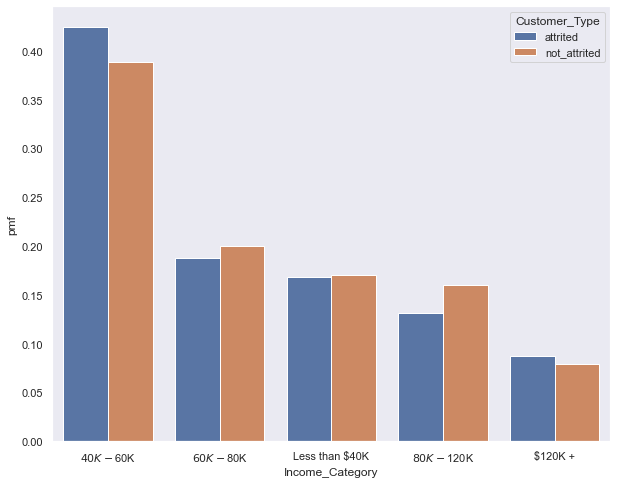

In [33]:
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_pmf, x = 'Income_Category', y = 'pmf', hue = 'Customer_Type')

Lets plot the pmf for Total Transaction Count feature and see how it looks. The customers who are willing to close will not use much credit card compared to customers who are retaining card. So Customers who are attrited should have less transaction count compared to not attrited customers.
Based on below chart we can see PMF of Total Trans Count is not right choise to see the distribution.
We will used CDF to see the distribution of Total Transaction Count

<AxesSubplot:xlabel='Income_Category', ylabel='pmf'>

Text(0.5, 0, 'Total Trans Count')

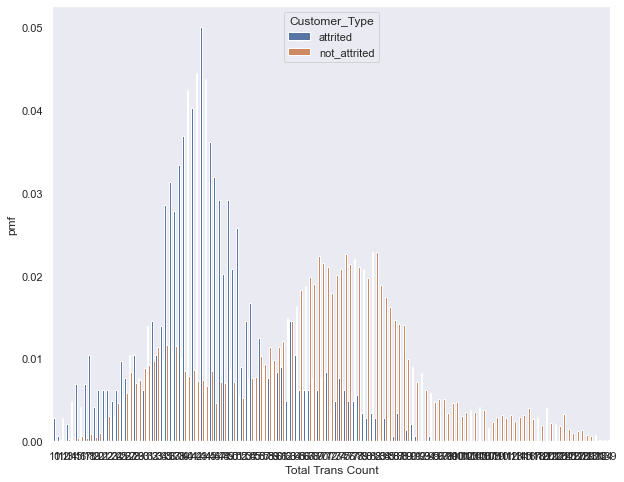

In [34]:
attrited_pmf2 = attrited.Total_Trans_Ct.value_counts(normalize=True)
not_attrited_pmf2 = not_attrited.Total_Trans_Ct.value_counts(normalize=True)

df_pmf2 = pmf_func(attrited_pmf2,not_attrited_pmf2)

fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_pmf2, x = 'Income_Category', y = 'pmf', hue = 'Customer_Type')
plt.xlabel('Total Trans Count')

#### CDF of variable Total_Trans_Ct, to see the customers who are attrited use less card compared to not attrited customers and also to check cdf of Income Category to see what percentage customers fall below certain income category, Because customers who are attrited having less income compared to other customers.

{'xscale': 'linear', 'yscale': 'linear'}

Text(0.5, 0, 'Total Transactions')

Text(0, 0.5, 'CDF')

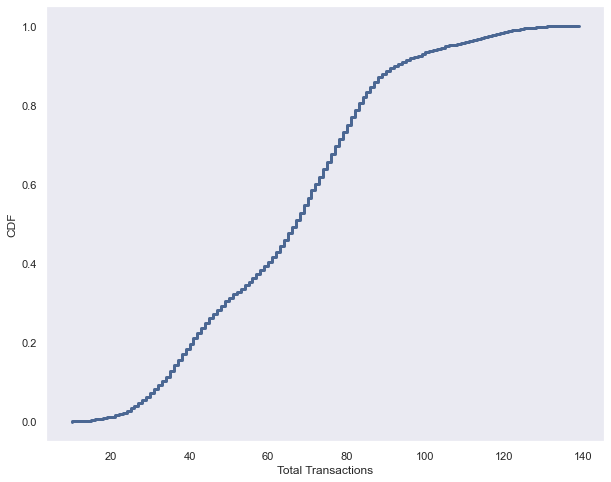

In [35]:
trans_tot_cdf = thinkstats2.Cdf(bank_cleaned.Total_Trans_Ct, label = 'Total Transactions Count')
fig = plt.figure(figsize=(10,8))
thinkplot.Cdf(trans_tot_cdf)
plt.xlabel('Total Transactions')
plt.ylabel('CDF')

{'xscale': 'linear', 'yscale': 'linear'}

Text(0.5, 0, 'Income Category')

Text(0, 0.5, 'CDF')

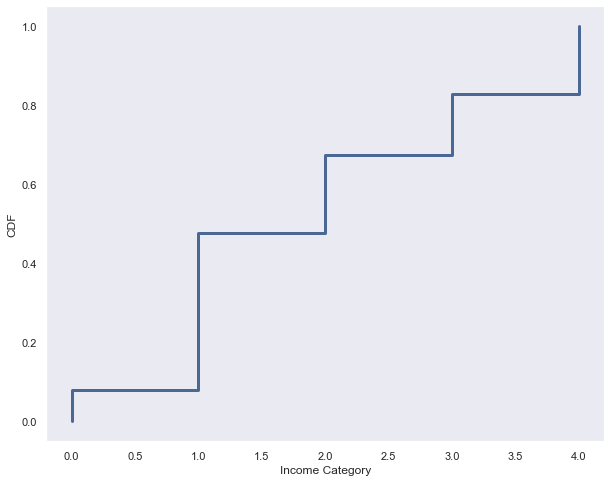

In [36]:
inc_cat_cdf = thinkstats2.Cdf(bank_cleaned.Income_Category, label = 'Income Category')
fig = plt.figure(figsize=(10,8))
thinkplot.Cdf(inc_cat_cdf)
plt.xlabel('Income Category')
plt.ylabel('CDF')
# {'$120K +': 4, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 0}

### Comparing the CDFs of attrited customer versus not attrited customers for Income Category and Total Trans Counts

Based on below charts, The total transactions of attrited customers are less compared to not attrited customers.
CDF graph shows that 40% of the attrited customers have transaction 40 or less in last 12 months, while not attrited customers have 65 or less transactions in last 12 months, and 90% of the attrited customers having transaction less than 70 on other hand 90% of non attrited customers having transactions 110 or less in last 12 months.
Based on this we can say that attrited customers tend to have less transactions compared to not attrited customers.

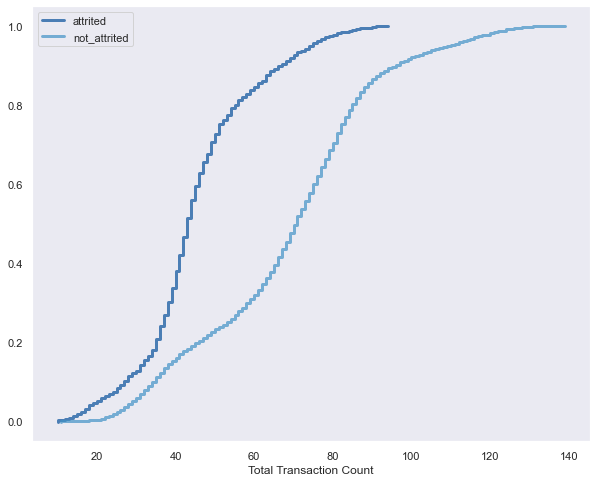

<Figure size 576x432 with 0 Axes>

In [37]:
attrited_trans_tot_cdf = thinkstats2.Cdf(attrited.Total_Trans_Ct, label = 'attrited')
not_attrited_trans_tot_cdf = thinkstats2.Cdf(not_attrited.Total_Trans_Ct, label = 'not_attrited')

fig = plt.figure(figsize=(10,8))
thinkplot.PrePlot(2)
thinkplot.Cdfs([attrited_trans_tot_cdf,not_attrited_trans_tot_cdf])
thinkplot.Show(xlabel = 'Total Transaction Count', ylable = 'CDF')

Based on the below CDF chart, it shows that the attrited customers having income less that $120K ($60K - $80K - $120K) is higher than not attrited customers but did not see much difference in low and higher income customers

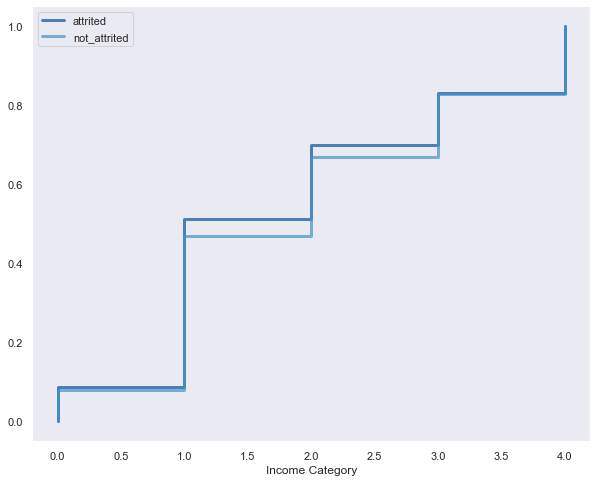

<Figure size 576x432 with 0 Axes>

In [38]:
attrited_inc_cat_cdf = thinkstats2.Cdf(attrited.Income_Category, label = 'attrited')
not_attrited_inc_cat_cdf = thinkstats2.Cdf(not_attrited.Income_Category, label = 'not_attrited')

fig = plt.figure(figsize=(10,8))
thinkplot.PrePlot(2)
thinkplot.Cdfs([attrited_inc_cat_cdf,not_attrited_inc_cat_cdf])
thinkplot.Show(xlabel = 'Income Category', ylable = 'CDF')

#### Modeling Distribution - Lognormal Distribution on Total Transactions Count

In [39]:
# function to make normal model

def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='Total Trans')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)
    
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='Total Trans')

In [40]:
total_trans = bank_cleaned.Total_Trans_Ct

Below chart is CDF of Total transaction counts of credit card customers, it shows distribution of total transactions on linear scale with normal model and we can see it does not fit completely.

n, mean, std 9008 64.57634798368827 22.549024126649616


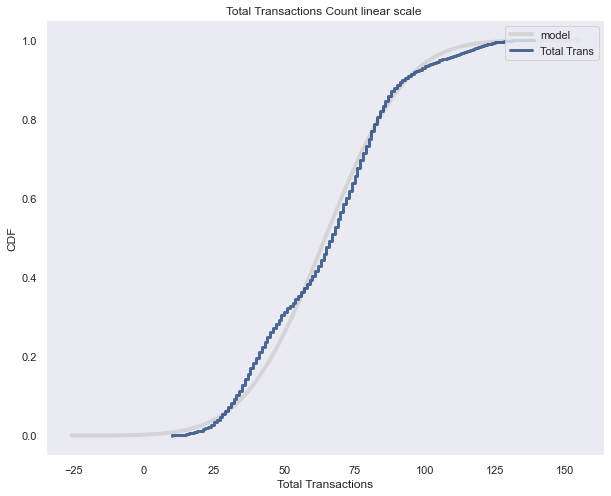

In [41]:
fig = plt.figure(figsize=(10,8))
MakeNormalModel(total_trans)
thinkplot.Config(title='Total Transactions Count linear scale ', xlabel='Total Transactions',
                 ylabel='CDF', loc='upper right')

Below chart is cdf of Total transactions on log scale and we can see this distribution is also does not fit with model

n, mean, std 9008 1.7798650704884864 0.16906764883257072


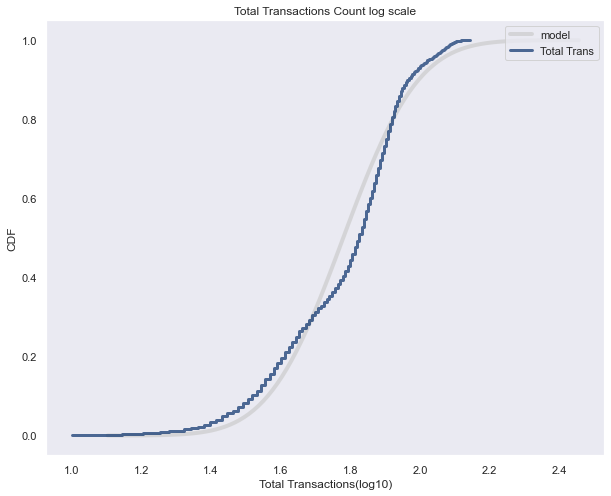

In [42]:
fig = plt.figure(figsize=(10,8))
log_weights = np.log10(total_trans)
MakeNormalModel(log_weights)
thinkplot.Config(title='Total Transactions Count log scale', xlabel='Total Transactions(log10)',
                 ylabel='CDF', loc='upper right')

The belos chart shows the normal probability of Total transactions made by both customers , we can see the it deviates from the model at both the ends.

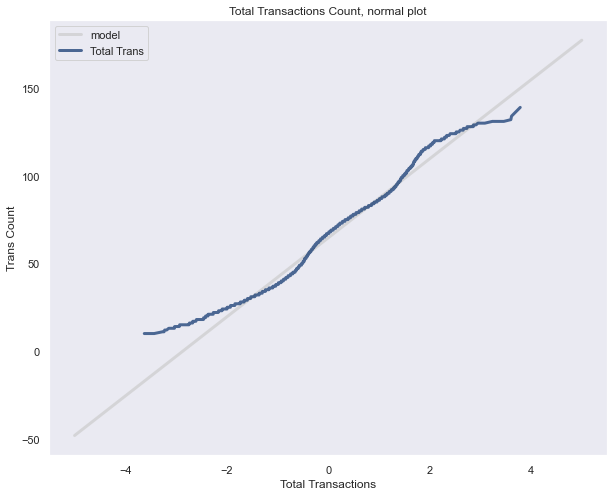

In [43]:
fig = plt.figure(figsize=(10,8))
MakeNormalPlot(total_trans)
thinkplot.Config(title='Total Transactions Count, normal plot', xlabel='Total Transactions',
                 ylabel='Trans Count', loc='upper left')

The below chart is same as above but on log scale , it shows that middle portion is fitting with model but the top and botton ends are deviating from the model.This could be the attrited customers having less transactions counts.

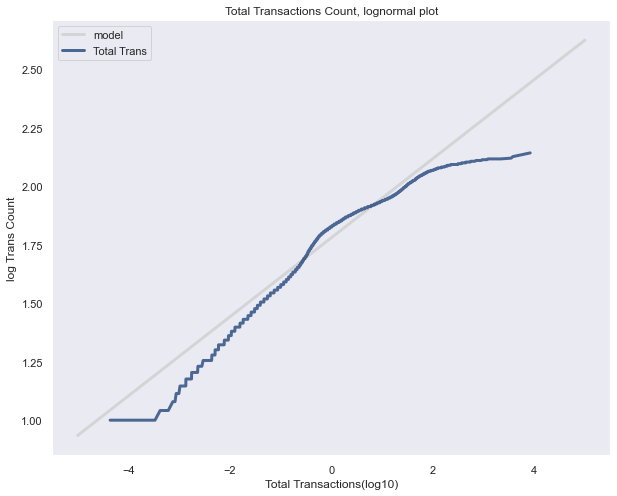

In [44]:
fig = plt.figure(figsize=(10,8))
MakeNormalPlot(log_weights)
thinkplot.Config(title='Total Transactions Count, lognormal plot', xlabel='Total Transactions(log10)',
                 ylabel='log Trans Count', loc='upper left')

### Correlation Of variables using Scatter plot

Lets check the correlation (pearson) of all varaible pairwise. 
Based on the below table we can see that  - 
1. Customer_Age and Months_on_book are positvely correlated.
2. Total_Revolving_Bal and Avg_Utilization_Ratio are positvely correlated.
3. Total_Trans_Ct and Total_Trans_Amt are positively correlated.
4. Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated.

Overall this table shows the linear relationship between two variables, few of the pairs shows values 0 or close to 0 that means these are not linearly correlated or thet have non-linear relationship

In [45]:
bank_cleaned.corr()

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.012251,0.025275,0.005413,-0.008892,0.147810,-0.153144,-0.197960,0.266096,-0.003778,0.162575,0.362021,0.184352
Customer_Age,-0.012251,1.000000,-0.021299,-0.017005,0.788108,-0.007511,0.056079,-0.019107,0.014193,0.007989,-0.047253,-0.065774,0.006203
Income_Category,0.025275,-0.021299,1.000000,0.043599,-0.013381,0.002917,-0.012270,0.007886,0.011383,0.254431,0.006966,-0.045321,-0.187836
Card_Category,0.005413,-0.017005,0.043599,1.000000,-0.011227,-0.067569,-0.012241,-0.001135,0.011708,0.462649,0.170652,0.115647,-0.209064
Months_on_book,-0.008892,0.788108,-0.013381,-0.011227,1.000000,-0.006013,0.075150,-0.009526,0.006824,0.011380,-0.039548,-0.049115,-0.009034
Total_Relationship_Count,0.147810,-0.007511,0.002917,-0.067569,-0.006013,1.000000,0.001551,0.060829,0.016731,-0.072687,-0.354503,-0.248554,0.073881
Months_Inactive_12_mon,-0.153144,0.056079,-0.012270,-0.012241,0.075150,0.001551,1.000000,0.027771,-0.045995,-0.009879,-0.039203,-0.044988,-0.011913
Contacts_Count_12_mon,-0.197960,-0.019107,0.007886,-0.001135,-0.009526,0.060829,0.027771,1.000000,-0.052207,0.024470,-0.111496,-0.150278,-0.052439
Total_Revolving_Bal,0.266096,0.014193,0.011383,0.011708,0.006824,0.016731,-0.045995,-0.052207,1.000000,-0.047606,0.061025,0.051829,0.625852
Avg_Open_To_Buy,-0.003778,0.007989,0.254431,0.462649,0.011380,-0.072687,-0.009879,0.024470,-0.047606,1.000000,0.160730,0.068489,-0.539670


Below Table shows the pair wise Covariance of all the features from the datset
Based on below chart few features vary in same directions having positive sign and values greater than 0 and few are negative covaraince meaning the vary in oppositve direction.

In [46]:
bank_cleaned.cov()

,Attrition_Flag,Customer_Age,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Attrition_Flag,0.134243,-0.035529,0.011535,0.001384,-0.025787,0.084289,-0.056437,-0.080364,79.276417,-1.264860e+01,2.055913e+02,3.140192,0.018809
Customer_Age,-0.035529,62.654215,-0.209998,-0.093918,49.377580,-0.092532,0.446471,-0.167573,91.347770,5.778218e+02,-1.290958e+03,-12.325483,0.013673
Income_Category,0.011535,-0.209998,1.551543,0.037894,-0.131932,0.005655,-0.015372,0.010883,11.528908,2.895866e+03,2.994785e+01,-1.336453,-0.065153
Card_Category,0.001384,-0.093918,0.037894,0.486880,-0.062008,-0.073380,-0.008591,-0.000877,6.642885,2.949784e+03,4.109875e+02,1.910389,-0.040623
Months_on_book,-0.025787,49.377580,-0.131932,-0.062008,62.652340,-0.074081,0.598299,-0.083548,43.917563,8.231039e+02,-1.080433e+03,-9.203699,-0.019912
Total_Relationship_Count,0.084289,-0.092532,0.005655,-0.073380,-0.074081,2.422373,0.002429,0.104898,21.174163,-1.033723e+03,-1.904346e+03,-9.158356,0.032020
Months_Inactive_12_mon,-0.056437,0.446471,-0.015372,-0.008591,0.598299,0.002429,1.011670,0.030949,-37.617946,-9.079260e+01,-1.360965e+02,-1.071261,-0.003337
Contacts_Count_12_mon,-0.080364,-0.167573,0.010883,-0.000877,-0.083548,0.104898,0.030949,1.227648,-47.035660,2.477415e+02,-4.263867e+02,-3.941929,-0.016180
Total_Revolving_Bal,79.276417,91.347770,11.528908,6.642885,43.917563,21.174163,-37.617946,-47.035660,661182.714442,-3.537118e+05,1.712680e+05,997.714023,141.712614
Avg_Open_To_Buy,-12.648603,577.821822,2895.865818,2949.783826,823.103949,-1033.723443,-90.792603,247.741493,-353711.781537,8.349384e+07,5.069081e+06,14815.888773,-1373.193264


### Scatter Plots

The Scatter plot of Total_Trans_Amt and Total_Trans_Ct shows as transaction amount increases as transaction amount, this quite obvisous and we can see the correlation between these two variables is positive.

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

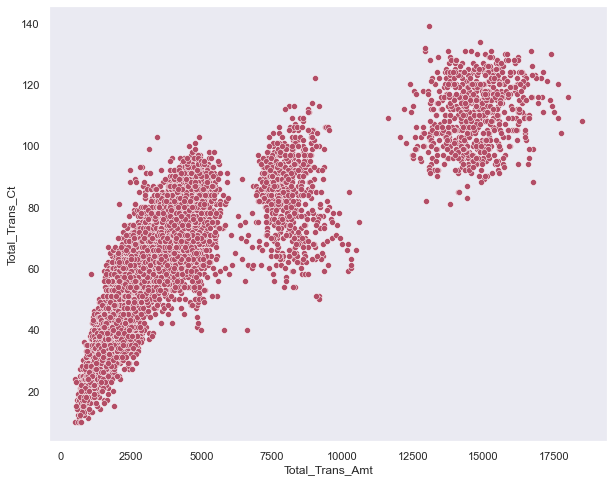

In [47]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=bank_cleaned, x = 'Total_Trans_Amt', y = 'Total_Trans_Ct', color = (0.7,0.3,0.4))

The relationship between Customer Age and Months_on_book is positive and both are strongly correlated. As customer age increaes so duration of credit card usage.

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

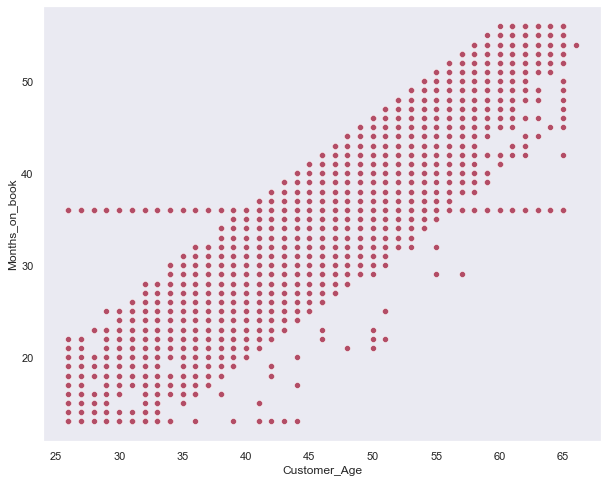

In [48]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=bank_cleaned, x = 'Customer_Age', y = 'Months_on_book', color = (0.7,0.3,0.4))

This scatter plot shows negative relationship between Avg_Open_To_Buy and Avg_Utilization_Ratio. This is quite obious too because as utilization decreases the open buy increases in credit card field.

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Avg_Utilization_Ratio'>

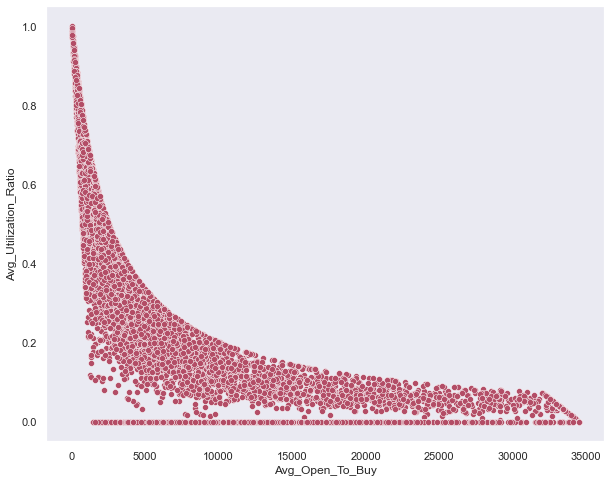

In [49]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=bank_cleaned, x = 'Avg_Open_To_Buy', y = 'Avg_Utilization_Ratio',color = (0.7,0.3,0.4))

This scatter plot shows somewhat positive relationship between Total_Revolving_Bal and Avg_Utilization_Ratio

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Avg_Utilization_Ratio'>

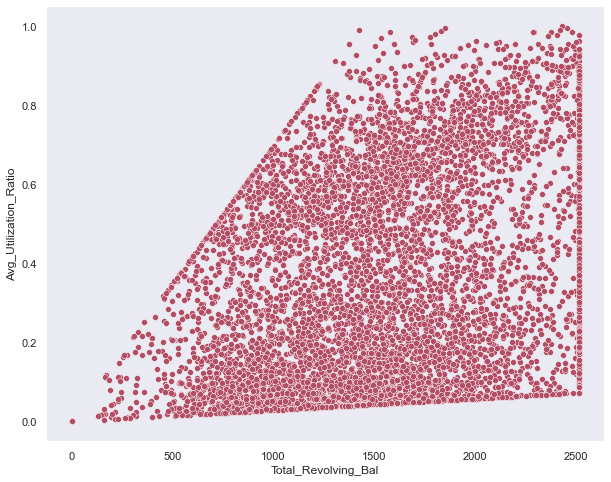

In [50]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=bank_cleaned, x = 'Total_Revolving_Bal', y = 'Avg_Utilization_Ratio',color = (0.7,0.3,0.4))

The below heatmap on correlation matrix shows which pairs of features are correlated, the darker the color the more correlated are the two features.

<AxesSubplot:>

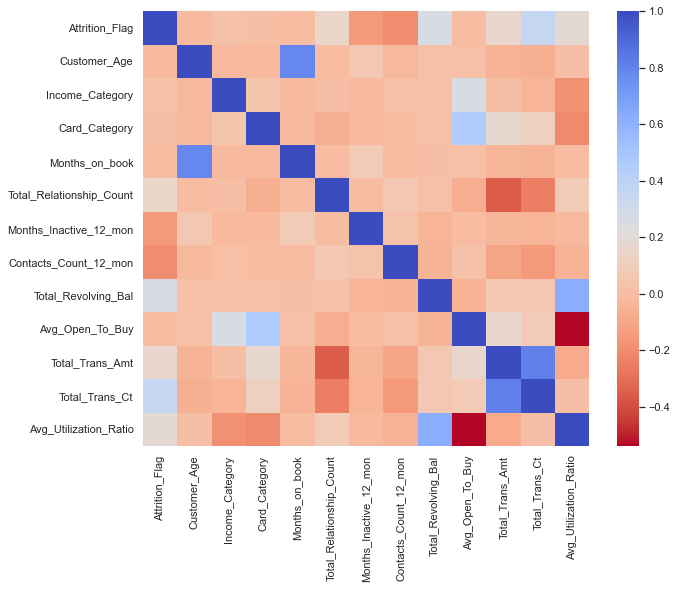

In [51]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(bank_cleaned.corr(),cmap='coolwarm_r')

### Hypothesis Testing  - Correlation Testing Between Transaction Count and Transaction Amount

The Hypothetical question here is based on analysis we have done so far , the customers who are having less transactions count that means card usage is less tends to close the account or dropoff and customer who uses more card tends to retain the card.

The Null hypothesis in this cases is there is no difference in transaction counts between attrited and non-attrited customers that means transaction counts are same for both of these customers.

Customers having less transactions meaning they are spending less amount and we saw in above scatter plot that transactions count and transaction amount have positive correlation and the correlation value is:0.81, this means they are strongly correlated.

In this hypothesis test, we are going to test Correlation.
Hypothesis Question - There is positive relation between total transactions count and total transactions amount and both are strognly correalted. This means that existing customers who use card a lot and spend large amount on the other hand attrited customers do not use card much and spend less amount.
we will test correlation if it is due to chance or real.

Null Hypothesis - This test to see there is no correaltion between total transactions count and total transactions amount and no impact on customers attrition.

In [52]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

Based on below result of hypothesis test of correlation performed on the sample , The p-value is 0, which means that after few sample iteration we didnot see correlation between these variables, which tells that p-value could be smaller but not 0.

In [53]:
data = bank_cleaned.Total_Trans_Ct.values, bank_cleaned.Total_Trans_Amt.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Based on the below result, the actual correlation between total transactions count and total transactions amount is 0.81 and the after few iterations the larges simulated correlation is 0.035, though it is small compared to actual but it is statistically significant.

In [54]:
f"The actual Correaltion between these variables: {ht.actual}"
f"The Correaltion between these variablese on largest simulated data: {ht.MaxTestStat()}"

'The actual Correaltion between these variables: 0.8100217288380259'

'The Correaltion between these variablese on largest simulated data: 0.035597998809654745'

# Regression Analysis  - Logistic Regression

Since the problem is to identify the customers who are dropping off given the factors (independent variables) that might influence the decision, so this is regression problem and the target or dependent variable is binary, so we are going to perform the logistic regression to predict the customers who are going to churn or not churn.

In [55]:
import statsmodels.formula.api as smf

In [56]:
formula = 'Attrition_Flag ~ Customer_Age+Income_Category+Card_Category+Months_on_book+Total_Relationship_Count+Months_Inactive_12_mon+Contacts_Count_12_mon+Total_Revolving_Bal+Avg_Open_To_Buy+Total_Trans_Amt+Total_Trans_Ct+Avg_Utilization_Ratio'

In [57]:
model = smf.logit(formula=formula, data=bank_cleaned)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.262893
         Iterations 8


In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 9008
Model:                          Logit   Df Residuals:                     8995
Method:                           MLE   Df Model:                           12
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.4015
Time:                        18:19:52   Log-Likelihood:                -2368.1
converged:                       True   LL-Null:                       -3956.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.0607      0.318    -12.755      0.000      -4.685      -3.437
Customer_Age                 0.0090      0.007      1.207      0.227      -0.006       0.024
Income_Category              0.1655      0.031      5.328      0.000       0.105       0.226
Card_Category               -0.1270      0.061     -2.088      0.037      -0.246      -0.008
Months_on_book               0.0059      0.008      0.783      0.434      -0.009       0.021
Total_Relationship_Count     0.4646      0.027     17.017      0.000       0.411       0.518
Months_Inactive_12_mon      -0.4986      0.038    -13.116      0.000      -0.573      -0.424
Contacts_Count_12_mon       -0.4822      0.036    -13.569      0.000      -0.552      -0.413
Total_Revolving_Bal          0.0010   6.97e-05     14.218      0.000       0.001       0.001
Avg_Open_To_Buy           1.195e-05   5.56e-06      2.150      0.032    1.05e-06    2.29e-05
Total_Trans_Amt             -0.0004   2.24e-05    -18.214      0.000      -0.000      -0.000
Total_Trans_Ct               0.1087      0.004     30.823      0.000       0.102       0.116
Avg_Utilization_Ratio        0.1933      0.243      0.796      0.426      -0.282       0.669
============================================================================================
"""

#### Analysis Of Result Summary - 

The method used for this model is - Maximum Likelihood Estomation (MLE), because here our goal is to find the parameter values that maximize the likelihood function.
From Above result the Log-likelihood value is -2368.1 and Log-likelihood null value is -3956.8, which tells that LL value when only intercept is the only parameter.
when we compare these two values the LLR p-value provides the p-value from a likelihood ratio of the model versus the null model. Here p-value is 0 so we can say that the Log-likelihood value -2368.1 is significant.
When we look at the parameters and corresponding p-value, we can conclude that -
for each unit increase in the value of below feature (considering all other constant) the log-odds of being classified as non-attrited customer increases by a value of their weight, the p-value is 0.0 or less than 0.05 means statistcally significant.
These are the most important features that would impact on customers decision whether to stay or leave.
1. Income_Category 
2. Total_Trans_Ct 
3. Total_Trans_Amt
4. Avg_Open_To_Buy
5. Total_Revolving_Bal
6. Contacts_Count_12_mon
7. Months_Inactive_12_mon
8. Total_Relationship_Count
9. Card_Category
10. Income_Category 

Also, the 95% confidence interval values for above important features does not cross 0, either positive or negative side and stays with side of 0 which tell that effect of these features on customer decisions in this model is statistcially significant.

Lastly, the Pseudo R-squared value is 0.4015, which is the substitute of Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

#### Test Predictions and Accuracy

In [59]:
predictions = results.predict(bank_cleaned.drop(['Attrition_Flag'], axis=1))

In [60]:
def func(x):     
    if x < 0.5:         
        return 0     
    else:         
        return 1

In [61]:
predictions = predictions.apply(func) 

In [62]:
from sklearn.metrics import (confusion_matrix,accuracy_score)

In [63]:
# confusion matrix
cm = confusion_matrix(bank_cleaned['Attrition_Flag'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(bank_cleaned['Attrition_Flag'], predictions))

Confusion Matrix : 
 [[ 724  715]
 [ 273 7296]]
Test accuracy =  0.8903197158081705


Based on above result the accuracy of the model is 0.89 or 89% , which very good and shows the model is accurate and good for predicting the customers churn.

# END